In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stadiums = pd.read_csv("stadium_data.csv") 
stadiums.head()

,Seating capacity,Team,Opened
0,45477,Los Angeles Angels,1966
1,41915,San Francisco Giants,2000
2,45529,St. Louis Cardinals,2006
3,48686,Arizona Diamondbacks,1998
4,41922,New York Mets,2009


In [3]:
champs = pd.read_csv("mlb_champs.csv") 
champs.replace('--', np.NaN)
champs[['Teams','Conference Year']] = champs['Teams'].str.split('(',expand=True)
champs[['Conference Year','Blank']] = champs['Conference Year'].str.split(')',expand=True)

champs.rename(columns={champs.columns[0]: 'Team'}, inplace=True)
champs.rename(columns={champs.columns[5]: 'Conference'}, inplace=True)

champs['Team']=champs.Team.astype('str')
del champs['Blank']

champs.head()

,Team,Series Wins,Series Played,Last Won,Last Played,Conference
0,New York Yankees,27,40,2009,2009,AL
1,St. Louis Cardinals,11,19,2011,2013,NL
2,Oakland Athletics,9,14,1989,1990,AL
3,San Francisco Giants,8,20,2014,2014,NL
4,Boston Red Sox,8,12,2013,2013,AL


In [4]:
merge = pd.merge(champs, stadiums, on="Team")
home_games_per_year=81
merge['Annual Capacity']=(merge['Seating capacity']*home_games_per_year)
merge.head()

,Team,Series Wins,Series Played,Last Won,Last Played,Conference,Seating capacity,Opened,Annual Capacity
0,New York Yankees,27,40,2009,2009,AL,47309,2009,3832029
1,St. Louis Cardinals,11,19,2011,2013,NL,45529,2006,3687849
2,Oakland Athletics,9,14,1989,1990,AL,47170,1966,3820770
3,San Francisco Giants,8,20,2014,2014,NL,41915,2000,3395115
4,Boston Red Sox,8,12,2013,2013,AL,37755,1912,3058155


In [5]:
baseball = pd.read_csv("baseball_2.csv") 
baseball.rename(columns={baseball.columns[3]: 'Team'}, inplace=True)
baseball.dropna(axis='rows')
attendance = baseball[['Team', 'Year', ' Attendance ']].copy()
att_merge=pd.merge(attendance, merge, on="Team")

att_merge=att_merge[['Team','Year', ' Attendance ', 'Annual Capacity', 'Opened']]
att_merge.dtypes
att_merge['% Attendance']=((att_merge[' Attendance '])/(att_merge['Annual Capacity'])*100)
att_merge['% Attendance']= att_merge['% Attendance'].map("{:,.2f}%".format)
per_att=att_merge['% Attendance'].tolist()
att_merge.head()

att_merge['% Attendance'] = att_merge['% Attendance'].str.replace("%","").astype(float)
att_merge.sort_values(by=['% Attendance'], ascending=False)
att_merge.head()

,Team,Year,Attendance,Annual Capacity,Opened,% Attendance
0,Arizona Diamondbacks,2016,2036216,3943566,1998,51.63
1,Arizona Diamondbacks,2015,2080145,3943566,1998,52.75
2,Arizona Diamondbacks,2014,2073730,3943566,1998,52.59
3,Arizona Diamondbacks,2013,2134895,3943566,1998,54.14
4,Arizona Diamondbacks,2012,2177617,3943566,1998,55.22


In [6]:
# To select rows whose column value equals a scalar, some_value, use ==:
frame_16=att_merge.loc[att_merge['Year'] == 2016]
frame_15=att_merge.loc[att_merge['Year'] == 2015]
frame_14=att_merge.loc[att_merge['Year'] == 2014]
frame_13=att_merge.loc[att_merge['Year'] == 2013]
frame_12=att_merge.loc[att_merge['Year'] == 2012]
frame_11=att_merge.loc[att_merge['Year'] == 2011]
frame_10=att_merge.loc[att_merge['Year'] == 2010]
frame_9=att_merge.loc[att_merge['Year'] == 2009]
frame_8=att_merge.loc[att_merge['Year'] == 2008]
frame_7=att_merge.loc[att_merge['Year'] == 2007]
frame_6=att_merge.loc[att_merge['Year'] == 2006]

att_06=frame_6['% Attendance'].tolist()
att_07=frame_7['% Attendance'].tolist()
att_08=frame_8['% Attendance'].tolist()
att_09=frame_9['% Attendance'].tolist()
att_10=frame_10['% Attendance'].tolist()
att_11=frame_11['% Attendance'].tolist()
att_12=frame_12['% Attendance'].tolist()
att_13=frame_13['% Attendance'].tolist()
att_14=frame_14['% Attendance'].tolist()
att_15=frame_15['% Attendance'].tolist()
att_16=frame_16['% Attendance'].tolist()

frame_6_sorted=frame_6.sort_values(by=['% Attendance'], ascending=False)
frame_7_sorted=frame_7.sort_values(by=['% Attendance'], ascending=False)
frame_8_sorted=frame_8.sort_values(by=['% Attendance'], ascending=False)
frame_9_sorted=frame_9.sort_values(by=['% Attendance'], ascending=False)
frame_10_sorted=frame_10.sort_values(by=['% Attendance'], ascending=False)
frame_11_sorted=frame_11.sort_values(by=['% Attendance'], ascending=False)
frame_12_sorted=frame_12.sort_values(by=['% Attendance'], ascending=False)
frame_13_sorted=frame_13.sort_values(by=['% Attendance'], ascending=False)
frame_14_sorted=frame_14.sort_values(by=['% Attendance'], ascending=False)
frame_15_sorted=frame_15.sort_values(by=['% Attendance'], ascending=False)
frame_16_sorted=frame_16.sort_values(by=['% Attendance'], ascending=False)

frame_6_tail=frame_6_sorted.tail()
frame_7_tail=frame_7_sorted.tail()
frame_8_tail=frame_8_sorted.tail()
frame_9_tail=frame_9_sorted.tail()
frame_10_tail=frame_10_sorted.tail()
frame_11_tail=frame_11_sorted.tail()
frame_12_tail=frame_12_sorted.tail()
frame_13_tail=frame_13_sorted.tail()
frame_14_tail=frame_14_sorted.tail()
frame_15_tail=frame_15_sorted.tail()
frame_16_tail=frame_16_sorted.tail()

#tails=pd.join(frame_6_tail,frame_7_tail, on='Team')
tails=frame_6_tail.append(frame_7_tail)
tails=tails.append(frame_8_tail)
tails=tails.append(frame_9_tail)
tails=tails.append(frame_10_tail)
tails=tails.append(frame_11_tail)
tails=tails.append(frame_12_tail)
tails=tails.append(frame_13_tail)
tails=tails.append(frame_14_tail)
tails=tails.append(frame_15_tail)
tails=tails.append(frame_16_tail)

bottom_teams=tails['Team'].value_counts()
bottom_teams

Oakland Athletics        11
Miami Marlins             7
Arizona Diamondbacks      5
Toronto Blue Jays         4
Tampa Bay Rays            4
Cleveland Indians         3
Seattle Mariners          3
Houston Astros            3
Pittsburgh Pirates        3
Chicago White Sox         3
Kansas City Royals        3
Philadelphia Phillies     2
Baltimore Orioles         2
Cincinnati Reds           1
Texas Rangers             1
Name: Team, dtype: int64

In [7]:

frame_6_head=frame_6_sorted.head()
frame_7_head=frame_7_sorted.head()
frame_8_head=frame_8_sorted.head()
frame_9_head=frame_9_sorted.head()
frame_10_head=frame_10_sorted.head()
frame_11_head=frame_11_sorted.head()
frame_12_head=frame_12_sorted.head()
frame_13_head=frame_13_sorted.head()
frame_14_head=frame_14_sorted.head()
frame_15_head=frame_15_sorted.head()
frame_16_head=frame_16_sorted.head()

#tails=pd.join(frame_6_tail,frame_7_tail, on='Team')
heads=frame_6_head.append(frame_7_head)
heads=heads.append(frame_8_head)
heads=heads.append(frame_9_head)
heads=heads.append(frame_10_head)
heads=heads.append(frame_11_head)
heads=heads.append(frame_12_head)
heads=heads.append(frame_13_head)
heads=heads.append(frame_14_head)
heads=heads.append(frame_15_head)
heads=heads.append(frame_16_head)

top_teams=heads['Team'].value_counts()
top_teams

Boston Red Sox           11
New York Yankees          9
Chicago Cubs              7
St. Louis Cardinals       6
San Francisco Giants      6
Philadelphia Phillies     5
New York Mets             4
Detroit Tigers            3
Minnesota Twins           2
Kansas City Royals        1
Toronto Blue Jays         1
Name: Team, dtype: int64

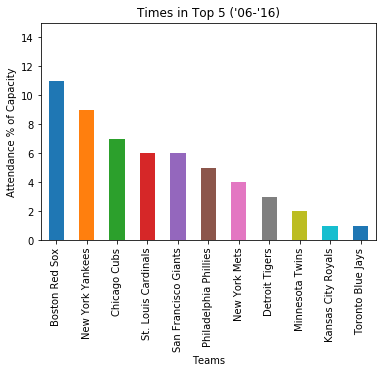

In [8]:
x_axis=np.arange(0,11,1)
plt.grid()
plt.title("Times in Top 5 ('06-'16)")
plt.xlabel('Teams')
plt.ylabel('Times in Bottom 5')
plt.ylim((0), (15))

top_teams_chart = top_teams.plot(kind='bar')
top_teams_chart.set_xlabel("Teams")
top_teams_chart.set_ylabel("Attendance % of Capacity")
plt.savefig("Top 5.png", bbox_inches='tight')

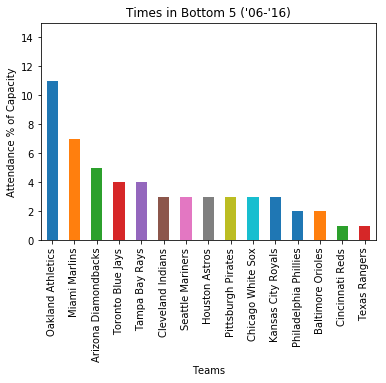

In [9]:
x_axis=np.arange(0,17,1)
plt.grid()
plt.title("Times in Bottom 5 ('06-'16)")
plt.xlabel('Teams')
plt.ylabel('Times in Bottom 5')
plt.ylim((0), (15))

bottom_teams_chart = bottom_teams.plot(kind='bar')
bottom_teams_chart.set_xlabel("Teams")
bottom_teams_chart.set_ylabel("Attendance % of Capacity")
plt.savefig("Bottom 5.png", bbox_inches='tight')

In [10]:
len(att_10)

29

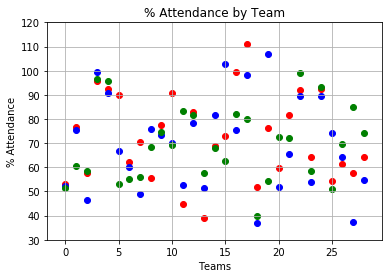

In [11]:
x_axis=np.arange(0,29,1)
y=np.arange
plt.grid()
plt.title("% Attendance by Team")
plt.xlabel('Teams')
plt.ylabel('% Attendance')
plt.ylim((30), (120))

plt.scatter(x_axis[0:29], att_06, marker="o", facecolors="red", edgecolors="red")
plt.scatter(x_axis[0:29], att_10, marker="o", facecolors="blue", edgecolors="blue")
plt.scatter(x_axis[0:29], att_16, marker="o", facecolors="green", edgecolors="green")

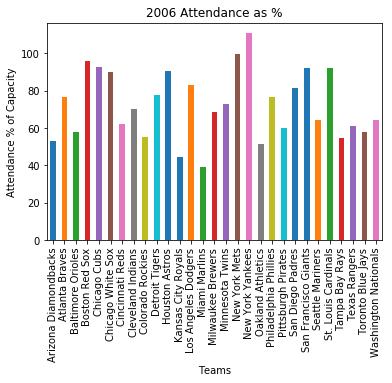

In [12]:
frame_6=frame_6.set_index('Team')
two_thousand_six = frame_6['% Attendance'].plot(kind='bar')
plt.title("2006 Attendance as %")
two_thousand_six.set_xlabel("Teams")
two_thousand_six.set_ylabel("Attendance % of Capacity")
plt.savefig("2006 Attendance.png", bbox_inches='tight')

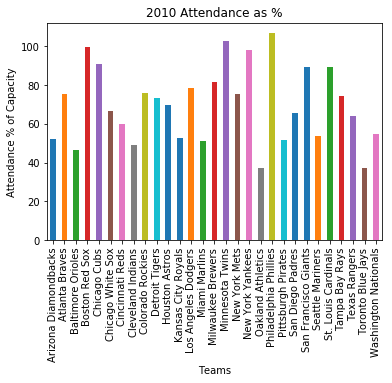

In [13]:
frame_10=frame_10.set_index('Team')
two_thousand_ten = frame_10['% Attendance'].plot(kind='bar')
plt.title("2010 Attendance as %")
two_thousand_ten.set_xlabel("Teams")
two_thousand_ten.set_ylabel("Attendance % of Capacity")
plt.savefig("2010 Attendance.png", bbox_inches='tight')

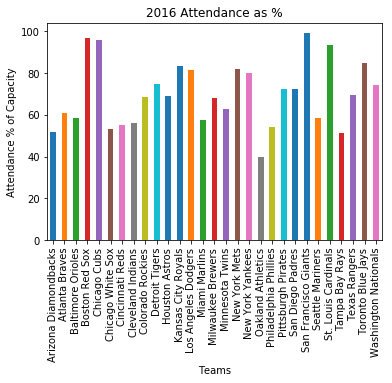

In [14]:
frame_16=frame_16.set_index('Team')
two_thousand_sixteen = frame_16['% Attendance'].plot(kind='bar')
plt.title("2016 Attendance as %")
two_thousand_sixteen.set_xlabel("Teams")
two_thousand_sixteen.set_ylabel("Attendance % of Capacity")
plt.savefig("2016 Attendance.png",bbox_inches='tight')

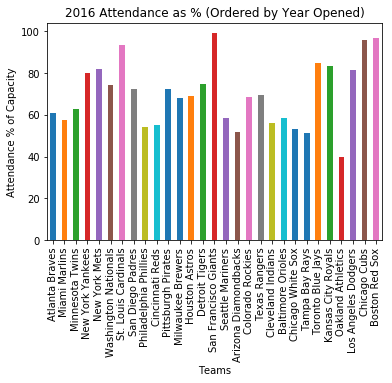

In [16]:
frame_16_opened=frame_16
frame_16_opened=frame_16_opened.sort_values(by=['Opened'], ascending=False)
sixteen = frame_16_opened['% Attendance'].plot(kind='bar')
plt.title("2016 Attendance as % (Ordered by Year Opened)")
sixteen.set_xlabel("Teams")
sixteen.set_ylabel("Attendance % of Capacity")
plt.savefig("2016 Attendance (Ordered by Year Opened).png",bbox_inches='tight')